In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import os
import copy
from football_sim.all import Calibrator, Season,Settings
%matplotlib inline
import platform

In [2]:
base_dir = './'

settings = Settings(os.path.join(base_dir, 'config.yaml'))

In [3]:
calib = Calibrator(settings)
calib.download_all_data() 
calib.process_data()

In [4]:
year = 2020
league = 'BPL'
as_of=pd.to_datetime('2020-01-01')
as_of=None
calib.calibrate_teams(league,year,as_of=as_of)

In [5]:
season = Season(league, year,calib, use_home_advantage=False,as_of=as_of)
print('home advantage', season.home_advantage)

season.process_current_results()
season.simulate_season(n_scenarios=100000)

season.process_simulation()

home advantage 1


In [6]:

ind=None
#i=season.match_id['bpl_burnley_manchesterunited_2021-01-12']
#hg=season.simulated_home_goals[i,:]
#ag=season.simulated_away_goals[i,:]
#ind=ag>hg
#i=season.match_id['bpl_liverpool_manchesterunited_2021-01-17']
#ind=None
#hg=season.simulated_home_goals[i,:]
#ag=season.simulated_away_goals[i,:]
#ind = ind&(ag>=hg)
#print(100*ind.sum()/ind.size)
# ind= None
#i = season.team_id['Manchester United']
#ind = season.place_per_team[i,:]<=4
ind = None
sr=season.season_report(ind=ind)
sr

,Played,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,rating,Degr
Manchester City,22,50,84.8,77,92,1,1,96.47,99.98,5.69,0.23,25.139922,0.00
Liverpool,23,40,70.4,62,78,6,2,1.35,84.23,5.46,0.30,18.303526,0.00
Manchester United,23,45,70.3,62,78,6,2,1.71,81.57,4.69,0.33,14.186071,0.00
Leicester City,23,43,66.0,58,74,8,2,0.26,48.53,3.88,0.31,12.504490,0.00
Chelsea,23,39,64.6,56,73,9,2,0.14,39.66,4.47,0.30,14.972507,0.00
West Ham United,23,39,60.1,52,68,11,4,0.01,10.32,3.79,0.36,10.520075,0.00
Tottenham Hotspur,22,36,60.0,51,69,11,3,0.02,12.54,4.07,0.36,11.321024,0.00
Everton,21,37,59.8,51,68,11,4,0.03,10.24,3.73,0.36,10.380685,0.00
Aston Villa,21,35,59.5,51,68,11,4,0.02,11.46,4.16,0.37,11.165947,0.00
Arsenal,23,31,53.2,45,61,14,7,0.00,0.64,3.66,0.32,11.398515,0.01


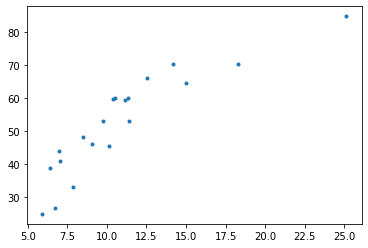

In [7]:
plt.plot(sr['rating'],sr['Points (mean)'],'.')

Chelsea
Leicester City
Liverpool
Manchester City
Manchester United


Text(0.5, 0, 'def')

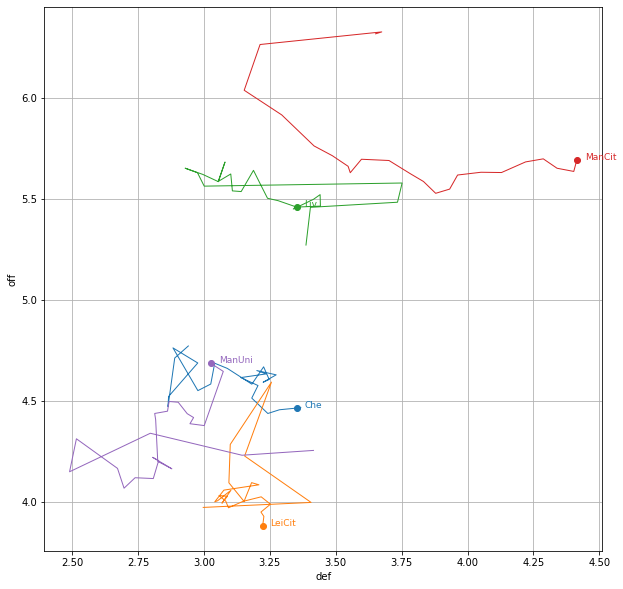

In [8]:
team_names = list(season.teams.keys())
y=[season.teams[x].offense for x in team_names]
x=[1/season.teams[x].defense for x in team_names]
plt.figure(figsize=(10,10))
#plt.plot(x,y,'.')
c=0
for x_,y_,name in zip(x,y,team_names):
    team = season.teams[name]
    if dict(sr['CL'])[name]>20:
        print(name)
        if c<=9:
            sym='-'
        else:
            sym='-'
        p=plt.plot(1/np.array(team.defense_hist),team.offense_hist,sym,label=name,color='C{:d}'.format(c),linewidth=1)
        c+=1
        plt.plot(x_,y_,'o',color=p[0].get_color())
        name_=''.join([x[:3] for x in name.split()])
        plt.text(x_+0.03,y_,name_,fontsize=9,color=p[0].get_color())
plt.grid(True)
plt.ylabel('off')
plt.xlabel('def')
#plt.legend()

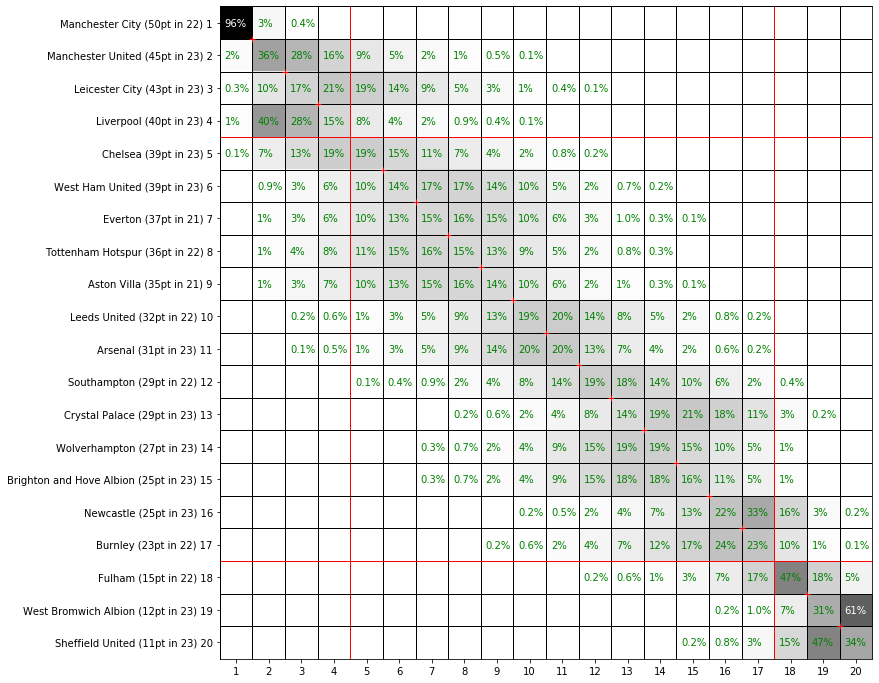

In [9]:
season.probability_grid(ind=ind);

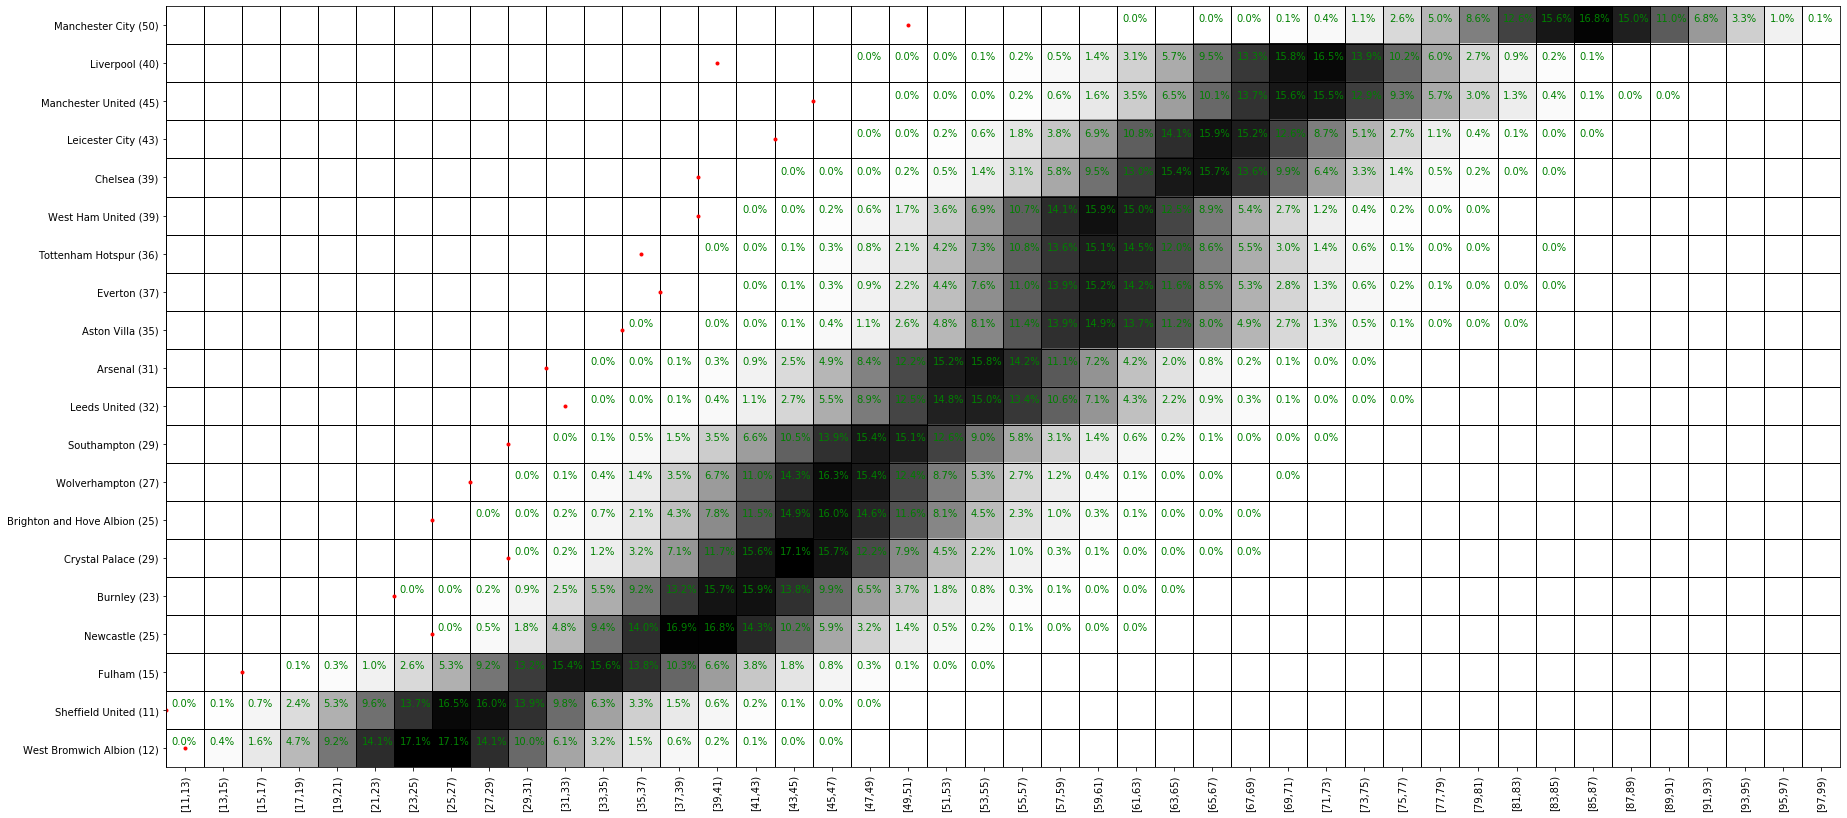

In [10]:
season.points_probability_grid(ind=ind);

,date,home,away,home_result,away_result,home win,away win,draw,home goals,away goals,p_cl,importance
234,2021-02-14,West Bromwich Albion,Manchester United,NaN,NaN,13.926,68.648,17.426,1.02512,2.45684,"[82, 70, 85, 76]",1.000000
245,2021-02-21,Manchester United,Newcastle,NaN,NaN,62.826,16.271,20.903,1.97753,0.89271,"[82, 86, 71, 77]",0.946750
351,2021-05-11,Manchester United,Leicester City,NaN,NaN,41.060,33.291,25.649,1.45192,1.28301,"[82, 90, 73, 80]",0.839423
282,2021-03-20,Crystal Palace,Manchester United,NaN,NaN,17.873,60.512,21.615,0.94368,1.93726,"[82, 72, 86, 77]",0.833026
364,2021-05-15,Manchester United,Fulham,NaN,NaN,58.721,20.474,20.805,2.06873,1.13780,"[82, 87, 72, 77]",0.814626
...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020-12-16,Leeds United,Newcastle,5.0,2.0,53.700,24.340,21.960,1.97950,1.28990,"[-1, -1, -1, -1]",0.000000
123,2020-12-16,Leicester City,Everton,0.0,2.0,42.690,32.430,24.880,1.48750,1.27020,"[-1, -1, -1, -1]",0.000000
122,2020-12-16,Arsenal,Southampton,1.0,1.0,40.010,32.850,27.140,1.34070,1.19970,"[-1, -1, -1, -1]",0.000000
121,2020-12-16,West Ham United,Crystal Palace,1.0,1.0,46.670,28.140,25.190,1.53930,1.14210,"[-1, -1, -1, -1]",0.000000


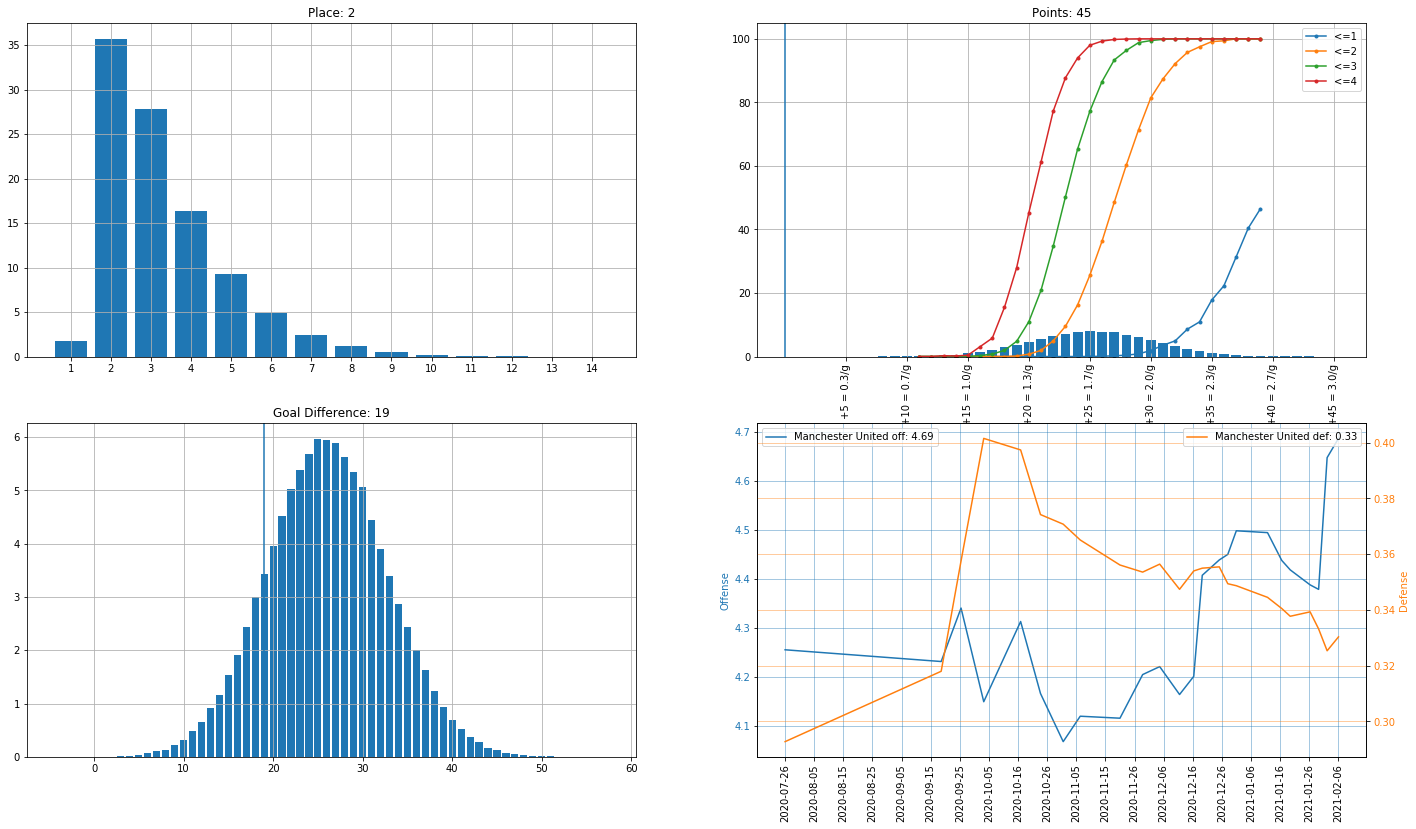

In [12]:
my_team = season.teams['Manchester United']

"""
names = []
importance = []
home=[]
away=[]

for m in season.matches_to_sim:
    #p=season.importance(m,ref_team=my_team,place=4,or_better=True)
    names.append(m.id)
    #importance.append(np.sum((p[1:]-p[0])**2))
    importance.append(season.importance(m,ref_team=my_team,place=4,or_better=True))
    home.append(m.home_team_name)
    away.append(m.away_team_name)

names=np.array(names)
importance=np.array(importance)

isort = np.argsort(-importance)
names=names[isort]
importance=importance[isort]

"""
season.team_report(my_team,places=[1,2,3,4])
#matches_to_report = [m for m in season.matches_to_sim if 'manchesterunited' in m.id]
#matches_to_report = [m for m in season.matches_to_sim ]
matches_to_report = calib.get_fixtures_for_league('BPL',2020)
df = pd.DataFrame({'date':[m.date for m in matches_to_report],
                   'id':[m.id for m in matches_to_report],
                   'home':[m.home_team_name for m in matches_to_report],
                   'away':[m.away_team_name for m in matches_to_report],
                   'home_result':[(m.home_goals) for m in matches_to_report],
                   'away_result':[(m.away_goals) for m in matches_to_report],
              'home win':[m.forecast_home_wins for m in matches_to_report],
             'away win':[m.forecast_away_wins for m in matches_to_report],
             'draw':[m.forecast_draw for m in matches_to_report],
            'home goals':[m.forecast_home_goals for m in matches_to_report],
             'away goals':[m.forecast_away_goals for m in matches_to_report],
            'p_cl':[np.round(season.what_if(m,ref_team=my_team,place=4,or_better=True,show_plot=False)[0]).astype(int) for m in matches_to_report],
             'importance':[100*season.importance(m,ref_team=my_team,place=4,or_better=True) for m in matches_to_report]})

#df.sort_values(by='importance',ascending=False)
df['importance']=(df['importance']-df['importance'].min())/(df['importance'].max()-df['importance'].min())
cols = [x for x in df.columns if x not in ['id']]
df[cols].sort_values(by='importance',ascending=False)
#df.loc[df['importance']>=0.5,cols]




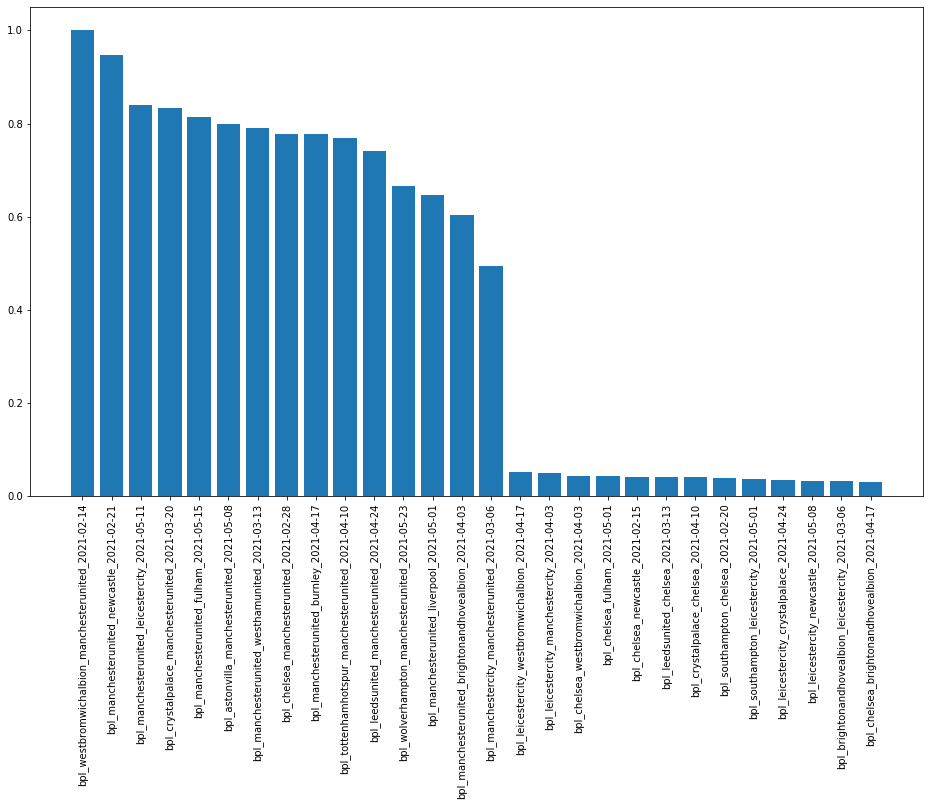

In [13]:
n_plot=28

plt.figure(figsize=(16,9))
df2=df.sort_values(by='importance',ascending=False).head(n_plot).copy()
plt.bar(np.arange(n_plot),df2['importance'].values)
plt.xticks(np.arange(n_plot),df2['id'].values,rotation=90);

In [15]:
season.matches_remaining(dec_cl=1)

,Date,Home,Away,H%,A%,D%,HG,AG,HCL,ACL
0,2021-01-13,Aston Villa,Tottenham Hotspur,37.640,38.222,24.138,1.49826,1.51210,"[11.459, 17.430924548352817, 6.833760661399194...","[12.542, 7.438894792773645, 18.727434461828267..."
1,2021-01-17,Aston Villa,Everton,40.015,35.215,24.770,1.49781,1.39197,"[11.459, 16.513807322254156, 6.880590657390317...","[10.243, 6.0852180432337875, 15.97330682947607..."
2,2021-02-13,Crystal Palace,Burnley,34.939,35.565,29.496,1.08350,1.09629,"[0.001, 0.0028621311428489653, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
3,2021-02-13,Brighton and Hove Albion,Aston Villa,34.336,40.327,25.337,1.32558,1.45991,"[0.005, 0.014561975768872321, 0.0, 0.0]","[11.459, 7.190703634669152, 16.286854960696306..."
4,2021-02-13,Manchester City,Tottenham Hotspur,63.430,16.212,20.358,2.04630,0.92771,"[99.985, 99.99211729465553, 99.95682210708118,...","[12.542, 9.774554627148037, 22.063903281519863..."
...,...,...,...,...,...,...,...,...,...,...
149,2021-05-23,Sheffield United,Burnley,33.316,35.811,30.873,0.95672,1.00402,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
150,2021-05-23,Fulham,Newcastle,43.164,30.932,25.904,1.45694,1.19356,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
151,2021-05-23,Wolverhampton,Manchester United,24.149,50.380,25.471,0.99095,1.55212,"[0.003, 0.012422874653194749, 0.0, 0.0]","[81.569, 72.93055613068864, 87.17149662564509,..."
152,2021-05-23,Arsenal,Brighton and Hove Albion,39.671,32.645,27.684,1.28525,1.14322,"[0.641, 1.1721408585616697, 0.1899218869658447...","[0.005, 0.0, 0.015316281206922959, 0.0]"


(array([81.569     , 70.21398822, 85.24647477, 76.15631815]),
 <Figure size 1152x648 with 1 Axes>)

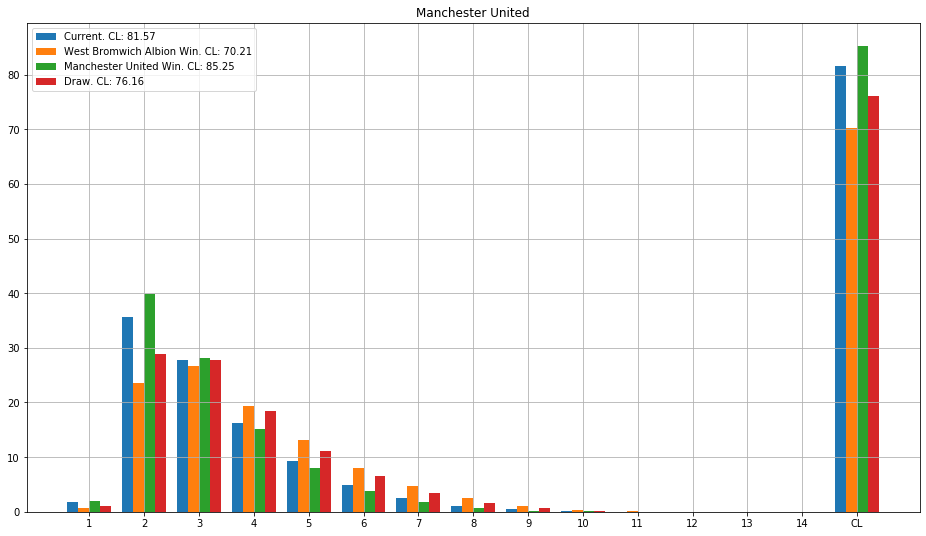

In [17]:
i=season.match_id['bpl_westbromwichalbion_manchesterunited_2021-02-14']
match = season.matches_to_sim[i]
mufc = season.teams['Manchester United']
#wh = season.teams['West Ham United']
season.what_if(match,ref_team=mufc,place=4,or_better=True)

D:\Miniconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


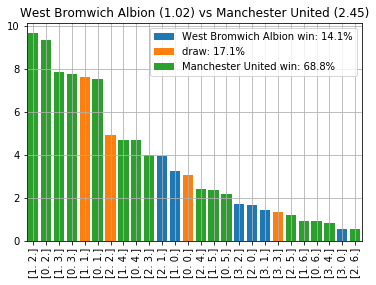

In [18]:
match.home_team.outcomes_vs(match.away_team)

In [ ]:
home_team=match.home_team
away_team=match.away_team
if home_team.name == 'Manchester United':
    print('home')
    l_mu=home_team.offense*away_team.defense/90
    l_other=home_team.defense*away_team.offense/90
    other_team_name = away_team.name
elif away_team.name == 'Manchester United':
    print('away')
    l_mu=home_team.defense*away_team.offense/90
    l_other=home_team.offense*away_team.defense/90
    other_team_name = home_team.name
else:
    print('no MU')


g_mu=np.random.exponential(1/l_mu,[100000,100])
g_other=np.random.exponential(1/l_other,[100000,100])
ng_mu=(g_mu.cumsum(axis=1)<90).sum(axis=1)
ng_other=(g_other.cumsum(axis=1)<90).sum(axis=1)



u_res,n=np.unique(np.array([ng_mu,ng_other]),axis=1,return_counts=True)
#isort=np.argsort(-n)
#u_res[:,isort[:10]]
points_for_right_result = 2
points_for_right_score = 3

points=[]

for i in range(u_res.shape[1]):
    guess = u_res[:,i]
    ind_right_score = (ng_mu==guess[0])&((ng_other==guess[1]))
    points_=points_for_right_score*ind_right_score.mean()
    #points_=0
    ind_right_result = (guess[0]>guess[1])&(ng_mu>ng_other)
    ind_right_result = ind_right_result | (guess[0]==guess[1])&(ng_mu==ng_other)
    ind_right_result = ind_right_result | (guess[0]<guess[1])&(ng_mu<ng_other)
    points_+=points_for_right_result*ind_right_result.mean()
    points.append(points_)
    #g_mu[:,0]
    
points=np.array(points)


df=pd.DataFrame({'Manchester United':u_res[0,:],other_team_name:u_res[1,:],'Points':points})
df=df.sort_values(by='Points',ascending=False)
df.head(10)

In [ ]:
season.matches_remaining(team_filter=['Manchester U'])

In [ ]:
ax=None
for team in calib.teams.values():
    if team.name in ['Manchester United','Leicester City','Chelsea']:
    #if team.name in ['BPLHome','BPLAway']:
        ax=team.plt(ax=ax)
        #ax[0].axvline(x=37)
        #ax[1].axvline(x=37)


In [ ]:
df=pd.read_csv('https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv')
df=df.set_index('name')
df = df.join(sr).reset_index()[['name','off','def','Off','Deff']].dropna()
df.head(10)

In [ ]:
plt.plot(df['off'],df['Off'],'.')
poly = np.polyfit(df['off'],df['Off'],1)
plt.plot(df['off'],np.polyval(poly,df['off']))
poly

In [ ]:
plt.plot(df['def'],df['Deff'],'.')
poly = np.polyfit(df['def'],df['Deff'],1)
plt.plot(df['def'],np.polyval(poly,df['def']))
poly

In [ ]:
plt.plot(df['off']/df['def'],df['Off']/df['Deff'],'.')